<a href="https://colab.research.google.com/github/donxuiqote/riset_informatika_c081/blob/main/coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud

In [14]:
df = pd.read_csv('dataset.csv')

In [15]:
df['score'].value_counts()


1    6959
2    1386
3     759
5     579
4     317
Name: score, dtype: int64

<Axes: xlabel='score'>

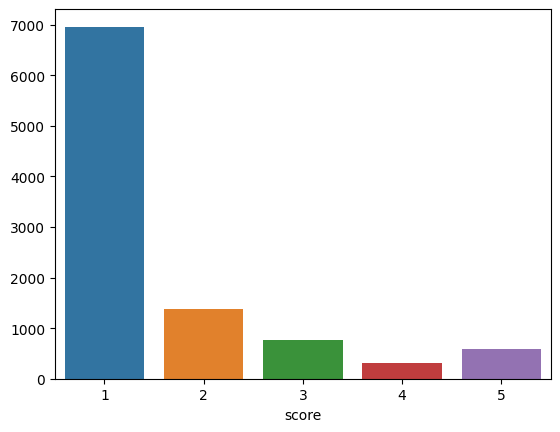

In [16]:
result = df.groupby(['score']).size()
sns.barplot(x = result.index, y = result.values)

In [17]:
sentimen = []
for index, row in df.iterrows():
  if row['score'] > 3:
    sentimen.append(1)
  elif row['score'] == 3:
    sentimen.append(0)
  else:
    sentimen.append(-1)
df['sentiment'] = sentimen
df.head()

,content,score,Year,Month,Day,sentiment
0,"PT. KAI yg terhormat, tolong aplikasi ini diti...",3,2018,9,16,0
1,Akhir2 ini saya booking lewat aplikasi ini ker...,2,2018,9,16,-1
2,"Aplikasinya lumayan membantu, cuma saja kenapa...",5,2018,9,17,1
3,Dari dulu sampai sekarang masih belum bisa nge...,1,2018,9,23,-1
4,Lebih bagus yang sebelumnya. Karena setelah up...,4,2018,9,24,1


<Axes: xlabel='sentiment'>

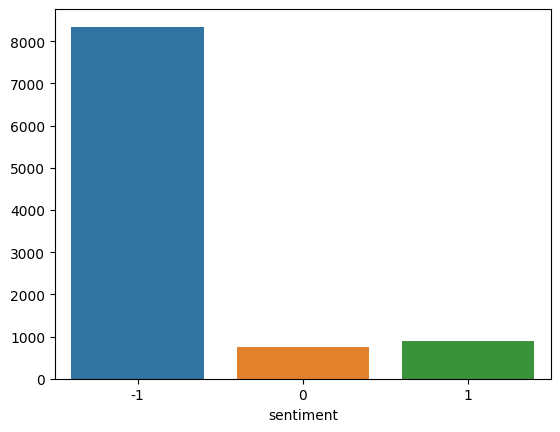

In [18]:
df_new = df[['Year', 'Month', 'sentiment']]
result = df_new.groupby(['sentiment']).size()
sns.barplot(x = result.index, y = result.values)

Text(0.5, 1.0, 'Distribusi Sentimen')

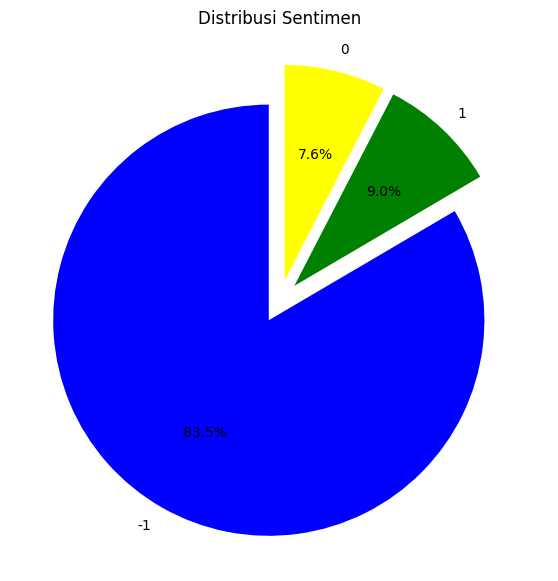

In [19]:
fig = plt.figure(figsize=(7,7))
colors = ('blue', 'green', 'yellow')
wp={'linewidth':2}
tags=df_new['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors=colors,
startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribusi Sentimen')

In [20]:
df3 = df_new.groupby(['Year','sentiment'])['sentiment'].count()
df3

Year  sentiment
2018  -1             60
       0             16
       1             15
2019  -1            814
       0            138
       1            154
2020  -1            622
       0             69
       1             88
2021  -1            168
       0             23
       1             60
2022  -1            565
       0             85
       1             63
2023  -1           6116
       0            428
       1            516
Name: sentiment, dtype: int64

In [21]:
df['content'] = df['content'].str.replace('https\S+', ' ', case=False)
df['content'] = df['content'].str.lower()
df['content'] = df['content'].str.replace('@\S+', ' ', case=False)
df['content'] = df['content'].str.replace('#\S+', ' ', case=False)
df['content'] = df['content'].str.replace("\'\w+", ' ', case=False)
df['content'] = df['content'].str.replace("[^\w\s]", ' ', case=False)
df['content'] = df['content'].str.replace("\s(2)", ' ', case=False)

from nltk.tokenize import word_tokenize

from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['content_token']=df['content'].apply(regexp.tokenize)
df.head(3)

<ipython-input-21-1f270d72b246>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('https\S+', ' ', case=False)
<ipython-input-21-1f270d72b246>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('@\S+', ' ', case=False)
<ipython-input-21-1f270d72b246>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('#\S+', ' ', case=False)
<ipython-input-21-1f270d72b246>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace("\'\w+", ' ', case=False)
<ipython-input-21-1f270d72b246>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace("[^\w\s]", ' ', case=False)
<i

,content,score,Year,Month,Day,sentiment,content_token
0,pt kai yg terhormat tolong aplikasi ini diti...,3,2018,9,16,0,"[pt, kai, yg, terhormat, tolong, aplikasi, ini..."
1,akhir2 ini saya booking lewat aplikasi ini ker...,2,2018,9,16,-1,"[akhir2, ini, saya, booking, lewat, aplikasi, ..."
2,aplikasinya lumayan membantu cuma saja kenapa...,5,2018,9,17,1,"[aplikasinya, lumayan, membantu, cuma, saja, k..."


In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stopwords = nltk.corpus.stopwords.words("indonesian")


my_stopwords = ['kai']
stopwords.extend(my_stopwords)


df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Year,Month,Day,sentiment,content_token
0,pt kai yg terhormat tolong aplikasi ini diti...,3,2018,9,16,0,"[pt, yg, terhormat, tolong, aplikasi, ditinjau..."
1,akhir2 ini saya booking lewat aplikasi ini ker...,2,2018,9,16,-1,"[akhir2, booking, aplikasi, kereta, ambarawa, ..."
2,aplikasinya lumayan membantu cuma saja kenapa...,5,2018,9,17,1,"[aplikasinya, lumayan, membantu, beli, tiket, ..."


In [23]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory



factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x])
df.head(10)


,content,score,Year,Month,Day,sentiment,content_token,stemmed
0,pt kai yg terhormat tolong aplikasi ini diti...,3,2018,9,16,0,"[pt, yg, terhormat, tolong, aplikasi, ditinjau...","[pt, yg, hormat, tolong, aplikasi, tinjau, ula..."
1,akhir2 ini saya booking lewat aplikasi ini ker...,2,2018,9,16,-1,"[akhir2, booking, aplikasi, kereta, ambarawa, ...","[akhir2, booking, aplikasi, kereta, ambarawa, ..."
2,aplikasinya lumayan membantu cuma saja kenapa...,5,2018,9,17,1,"[aplikasinya, lumayan, membantu, beli, tiket, ...","[aplikasi, lumayan, bantu, beli, tiket, tawang..."
3,dari dulu sampai sekarang masih belum bisa nge...,1,2018,9,23,-1,"[ngeperbaikin, error, ngga, ganti, kursi, opsi...","[ngeperbaikin, error, ngga, ganti, kursi, opsi..."
4,lebih bagus yang sebelumnya karena setelah up...,4,2018,9,24,1,"[bagus, update, sisa, kursinya, tertulis, ters...","[bagus, update, sisa, kursi, tulis, sedia, tol..."
5,mau pesan tiket tapi muncul mohon periksa kone...,1,2018,9,24,-1,"[pesan, tiket, muncul, mohon, periksa, koneksi...","[pesan, tiket, muncul, mohon, periksa, koneksi..."
6,setelah update fitur jumlah ketersediaan kurs...,1,2018,9,25,-1,"[update, fitur, ketersediaan, kursi, angka, re...","[update, fitur, sedia, kursi, angka, real, hil..."
7,terimakasih kai access telah menanggapi ulasan...,3,2018,9,25,0,"[terimakasih, access, menanggapi, ulasan, sya,...","[terimakasih, access, tanggap, ulas, sya, upda..."
8,tidak menampilkan jumlah kursi yang tersedia i...,1,2018,9,27,-1,"[menampilkan, kursi, tersedia, menyusahkan, se...","[tampil, kursi, sedia, susah, minggu, jakarta,..."
9,admin yang terhormat bisa di share apa alasan...,1,2018,9,28,-1,"[admin, terhormat, share, alasan, mengupdate, ...","[admin, hormat, share, alas, mengupdate, aplik..."


In [24]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df.head(5)

,content,score,Year,Month,Day,sentiment,content_token,stemmed,text_string
0,pt kai yg terhormat tolong aplikasi ini diti...,3,2018,9,16,0,"[pt, yg, terhormat, tolong, aplikasi, ditinjau...","[pt, yg, hormat, tolong, aplikasi, tinjau, ula...",hormat tolong aplikasi tinjau ulang pindah kur...
1,akhir2 ini saya booking lewat aplikasi ini ker...,2,2018,9,16,-1,"[akhir2, booking, aplikasi, kereta, ambarawa, ...","[akhir2, booking, aplikasi, kereta, ambarawa, ...",akhir2 booking aplikasi kereta ambarawa expres...
2,aplikasinya lumayan membantu cuma saja kenapa...,5,2018,9,17,1,"[aplikasinya, lumayan, membantu, beli, tiket, ...","[aplikasi, lumayan, bantu, beli, tiket, tawang...",aplikasi lumayan bantu beli tiket tawang jaya ...
3,dari dulu sampai sekarang masih belum bisa nge...,1,2018,9,23,-1,"[ngeperbaikin, error, ngga, ganti, kursi, opsi...","[ngeperbaikin, error, ngga, ganti, kursi, opsi...",ngeperbaikin error ngga ganti kursi opsi denah...
4,lebih bagus yang sebelumnya karena setelah up...,4,2018,9,24,1,"[bagus, update, sisa, kursinya, tertulis, ters...","[bagus, update, sisa, kursi, tulis, sedia, tol...",bagus update sisa kursi tulis sedia tolong tam...


In [25]:
df['text_string'] = df['text_string'].astype('str')
df['text_string'] = df['text_string'].astype(pd.StringDtype())
df.dtypes

content          object
score             int64
Year              int64
Month             int64
Day               int64
sentiment         int64
content_token    object
stemmed          object
text_string      string
dtype: object

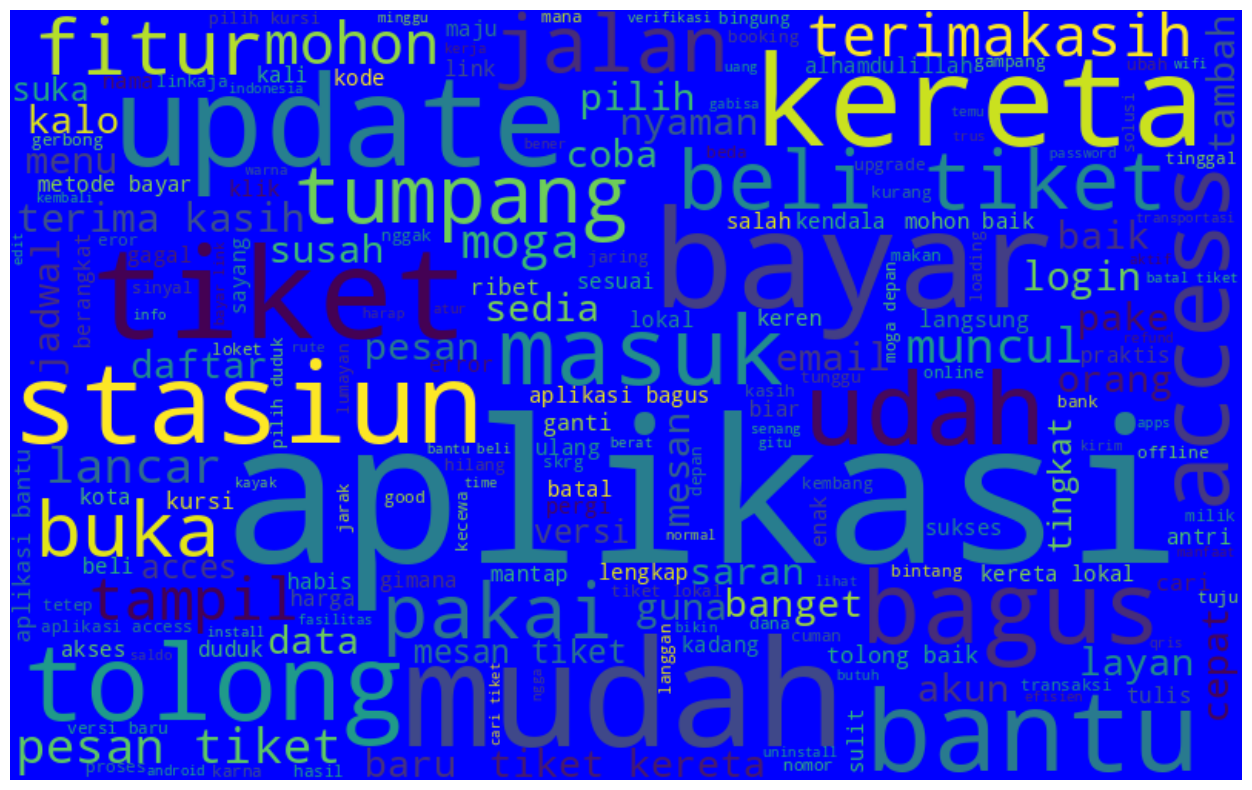

In [26]:
df_p=df[df['sentiment']==1]
all_words_lem = ' '.join([word for word in df_p['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='blue', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

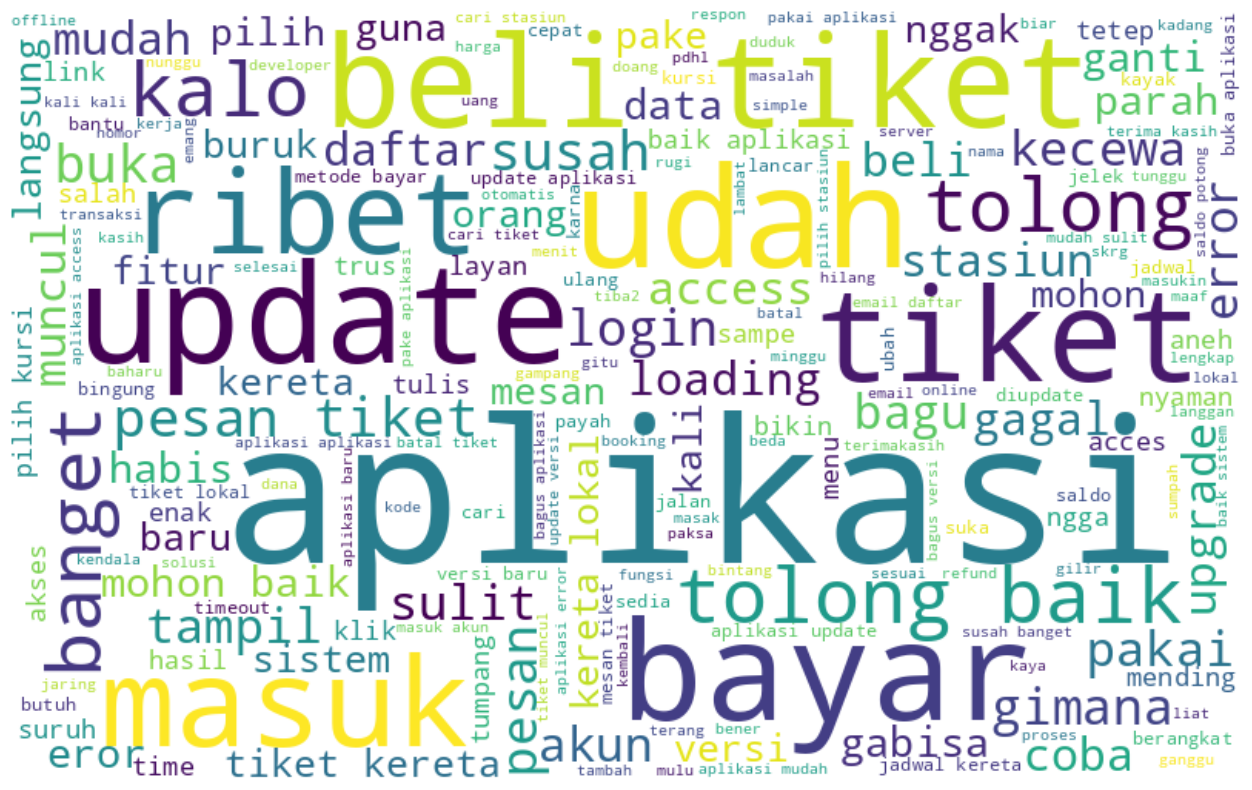

In [27]:
df_neg=df[df['sentiment']==-1]
all_words_lemneg = ' '.join([word for word in df_neg['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemneg)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

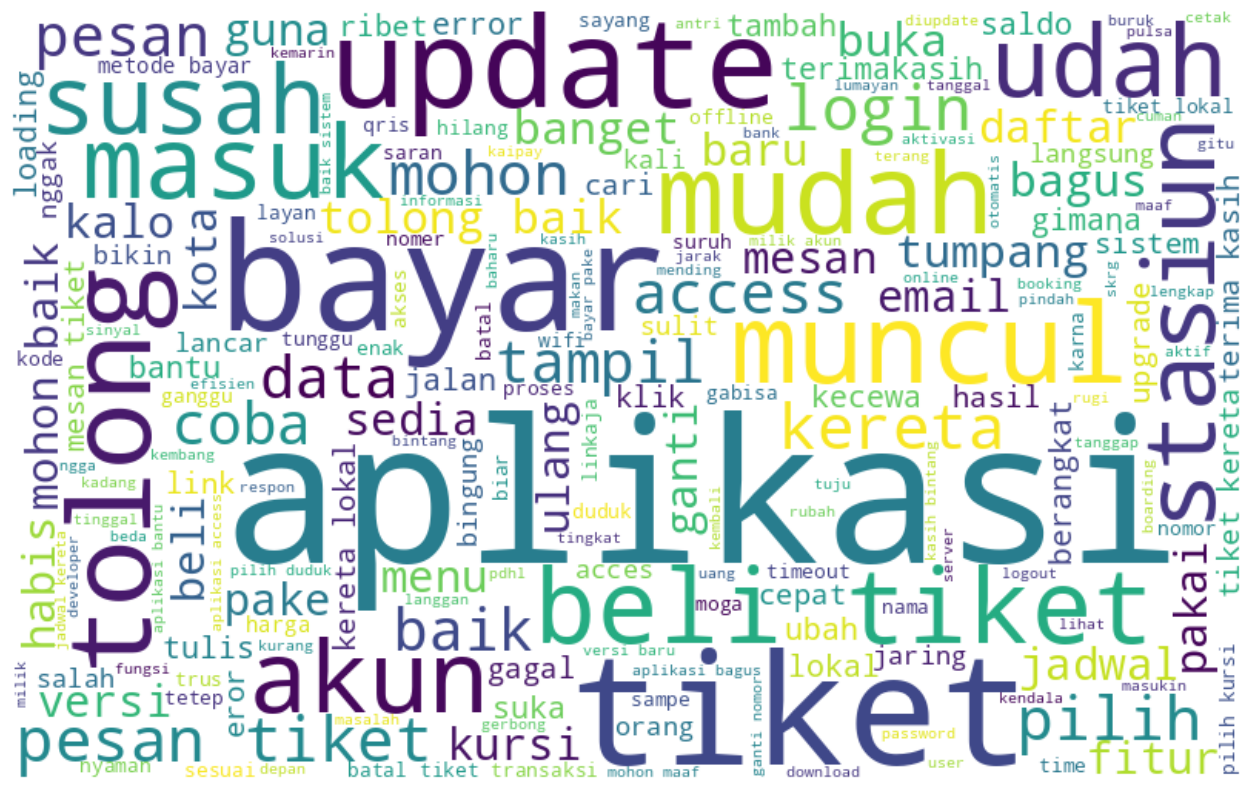

In [28]:
df_net=df[df['sentiment']==0]
all_words_lemnet = ' '.join([word for word in df_net['text_string']])
%matplotlib inline

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemnet)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer
from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
X = df['text_string']
y = df['sentiment']
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [31]:
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [32]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.1,random_state=3)
#random forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.9824281150159745

In [33]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.9792332268370607

In [34]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7835463258785943

In [35]:
data_akurasi = [[90,10,88.28,87.41,71.99], [80,20,87.37,86.78,72.46],[70,30,86.57,86.78,72.07],[60,40,85.20,85.65,71.60],[50,50,84.06,84.75,70.86],[40,60,81.76,82.92,69.35],[30,70,79.49,81.94,68.73],[20,80,66.59,79.21,66.59],[10,90,69.96,76.60,63.89]]

df_akurasi = pd.DataFrame(data_akurasi, columns=['data_train', 'data_tes', 'random_fores', 'SVM', 'naive_bayes'])

df_akurasi

,data_train,data_tes,random_fores,SVM,naive_bayes
0,90,10,88.28,87.41,71.99
1,80,20,87.37,86.78,72.46
2,70,30,86.57,86.78,72.07
3,60,40,85.20,85.65,71.60
4,50,50,84.06,84.75,70.86
5,40,60,81.76,82.92,69.35
6,30,70,79.49,81.94,68.73
7,20,80,66.59,79.21,66.59
8,10,90,69.96,76.60,63.89


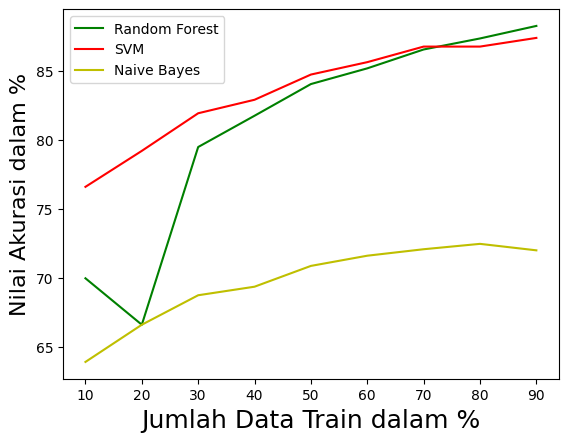

In [36]:
plt.plot(df_akurasi['data_train'], df_akurasi['random_fores'], 'g', label='Random Forest')
plt.plot(df_akurasi['data_train'], df_akurasi['SVM'], 'r', label='SVM')
plt.plot(df_akurasi['data_train'], df_akurasi['naive_bayes'], 'y', label='Naive Bayes')
plt.xlabel('Jumlah Data Train dalam %', fontsize=18)
plt.ylabel('Nilai Akurasi dalam %', fontsize=16)
plt.legend()
plt.show()

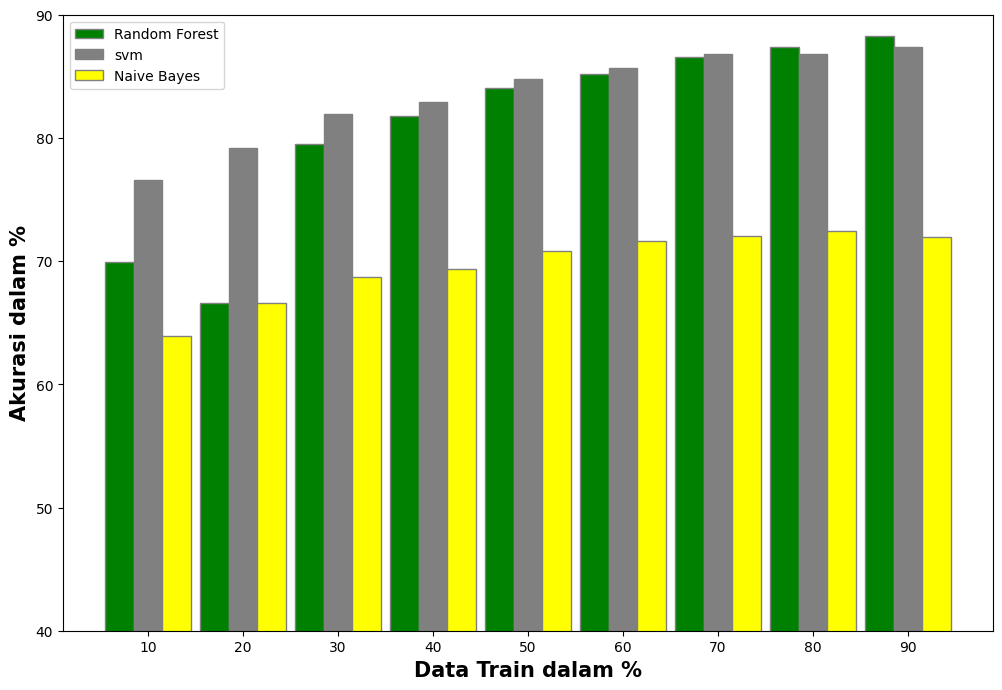

In [44]:
#sorting berdasarkan data train ascending
df_akurasi = df_akurasi.sort_values(by='data_train', ascending=True)
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
# set height of bar
#IT = [12, 30, 1, 8, 22]
#ECE = [28, 6, 16, 5, 10]
#CSE = [29, 3, 24, 25, 17]
# Set position of bar on X axis
br1 = np.arange(len(df_akurasi['random_fores']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# Make the plot
plt.bar(br1, df_akurasi['random_fores'], color ='green', width = barWidth,
  edgecolor ='grey', label ='Random Forest')
plt.bar(br2, df_akurasi['SVM'], color ='gray', width = barWidth,
  edgecolor ='grey', label ='svm')
plt.bar(br3, df_akurasi['naive_bayes'], color ='yellow', width = barWidth,
  edgecolor ='grey', label ='Naive Bayes')
plt.ylim(40, 90)
# Adding Xticks
plt.xlabel('Data Train dalam %', fontweight ='bold', fontsize = 15)
plt.ylabel('Akurasi dalam %', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(df_akurasi['random_fores']))],
  df_akurasi['data_train'])
plt.legend()
plt.show()